In [2]:
%matplotlib inline
import os
import ipywidgets as widgets
from matplotlib import pyplot as plt

# size of latent z vector
nz = widgets.IntText(
    value=512,
    description='nz'
)

ngf =  widgets.IntText(
    value=32,
    description='ngf'
)

ndf =  widgets.IntText(
    value=16,
    description='ndf'
)

lr = widgets.FloatText(
    value = 0.002,
    description = 'learning rate'
)

beta1 = widgets.FloatText(
    value = 0.5,
    description = 'beta 1'
)

im_size = widgets.IntText(
    value = 64,
    description = 'im size'
)

file_path = widgets.Text(
    description = 'path'
)

u_box = widgets.HBox([nz, ngf, ndf])
b_box = widgets.HBox([lr, beta1,im_size])
v_b = widgets.VBox([u_box,b_box,file_path])

display(v_b)

In [15]:
import dcgan
import torch
nc = 1

netG = dcgan.make_generator_model(im_size.value, nz.value, nc, ngf.value).cuda()
netG.load_state_dict(torch.load(file_path.value))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [16]:
netG.eval()

Sequential(
  (0): ConvTranspose3d(100, 1024, kernel_size=(4, 4, 4), stride=(1, 1, 1), bias=False)
  (1): BatchNorm3d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): ConvTranspose3d(1024, 512, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (4): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace)
  (6): ConvTranspose3d(512, 256, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (7): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace)
  (9): ConvTranspose3d(256, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (10): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace)
  (12): ConvTranspose3d(128, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (13): BatchNorm3d(64, eps=1e-05, moment

In [17]:
BATCH_SIZE = 1

noise = torch.rand((BATCH_SIZE,nz.value,1,1,1)).to('cuda:0', dtype=torch.float)
fake = netG(noise)


In [18]:
output = fake.to(torch.device("cpu"))
img = output.detach().numpy()[0,0,:,:,:]


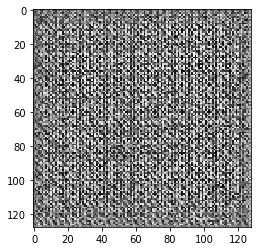

In [19]:
fig, ax = plt.subplots()
ax.imshow(img[:,:,50], cmap = 'gray')
plt.show()

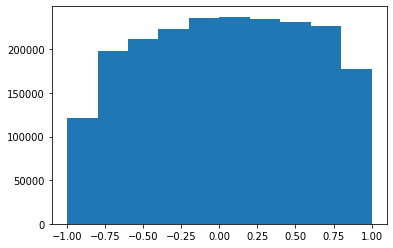

In [20]:
fig, ax = plt.subplots()
ax.hist(img.flatten())
plt.show()

In [21]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(img)
binary = img > thresh

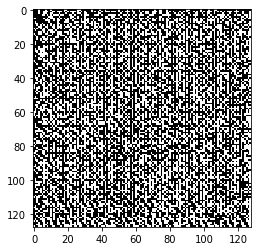

In [22]:
fig, ax = plt.subplots()
ax.imshow(binary[:,:,50], cmap = 'gray')
plt.show()